In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
import seaborn as sns
import datetime
from statsmodels.stats.proportion import proportions_ztest

In [2]:
file = r"..\data\clean\complete_clean.csv"
file_test = r"..\data\clean\test_group_clean.csv"
file_control = r"..\data\clean\control_group_clean.csv"

df_all = pd.read_csv(file)
df_test = pd.read_csv(file_test)
df_control =  pd.read_csv(file_control)
df_demo = pd.read_csv('../data/clean/final_demo_clean.csv')

In [3]:
#cross tab des variations par step 

crosstab_all = pd.crosstab(df_all["process_step"], df_all["variation"])

#percentage per step -> Completion Rate
control_counts = crosstab_all['control']
test_counts = crosstab_all['test']

control_start = control_counts.iloc[0]
test_start = test_counts.iloc[0]

print(control_start)
print(test_start)

control_percentages = [count / control_start * 100 for count in control_counts]
test_percentages = [count / test_start * 100 for count in test_counts]

print("Control :", control_percentages)
print("Test :", test_percentages)

47608
56474
Control : [100.0, 62.31725760376408, 54.3732145857839, 47.88060830112586, 36.76903041505629]
Test : [100.0, 68.64751921238091, 54.87303892056522, 45.851188157382154, 45.54662322484683]


## Taux de complétion

Hypothèse : Comparer le taux de complétion entre le groupe Test (nouveau design) et le groupe Contrôle (ancien design).

Objectif : Vérifier si la différence est statistiquement significative.

Actions : Définir les hypothèses nulle et alternative, tester avec le niveau de signification approprié, analyser le p-value et d'autres mesures statistiques.

Hypothèse nulle (H0) : Il y a une différence significative dans le taux de complétion entre le groupe Test (nouveau design) et le groupe Contrôle (ancien design).

Hypothèse alternative (H1) : Il n'y a pas de différence significative dans le taux de complétion entre le groupe Test (nouveau design) et le groupe Contrôle (ancien design).

In [4]:
# Example data
n_test = test_start  # Sample size for the test group
n_control = control_start  # Sample size for the control group

# Completion rates
completion_rate_test = test_percentages[-1] / 100
completion_rate_control = control_percentages[-1] / 100

# Number of successes (completions)
successes_test = n_test * completion_rate_test
successes_control = n_control * completion_rate_control

# Perform the z-test for proportions
count = [successes_test, successes_control]
nobs = [n_test, n_control]

stat, p_value = proportions_ztest(count, nobs, alternative='larger')

# Print results
print(f"z-statistic: {stat}")
print(f"p-value: {p_value}")

# Interpretation of p-value
if p_value < 0.05:
    print("Reject the null hypothesis: The test group has a significantly higher completion rate than the control group.")
else:
    print("Fail to reject the null hypothesis: No significant difference in completion rates.")


z-statistic: 28.628711797088698
p-value: 1.4757732634476226e-180
Reject the null hypothesis: The test group has a significantly higher completion rate than the control group.


## Temps de complétion 

Vérifier si le groupe de test prend en moyenne moins de temps à compléter le processus que le groupe de control 

In [5]:
untouched_df_all = df_all.copy()
df_all[df_all['process_step'] == 'start'] = df_all[df_all['process_step'] == 'start'].drop_duplicates(subset=['client_id', 'visit_id', 'process_step'], keep='last')
df_all[df_all['process_step'] == 'step_1'] = df_all[df_all['process_step'] == 'step_1'].drop_duplicates(subset=['client_id', 'visit_id', 'process_step'], keep='last')
df_all[df_all['process_step'] == 'step_2'] = df_all[df_all['process_step'] == 'step_2'].drop_duplicates(subset=['client_id', 'visit_id', 'process_step'], keep='last')
df_all[df_all['process_step'] == 'step_3'] = df_all[df_all['process_step'] == 'step_3'].drop_duplicates(subset=['client_id', 'visit_id', 'process_step'], keep='last')
df_all[df_all['process_step'] == 'validate'] = df_all[df_all['process_step'] == 'validate'].drop_duplicates(subset=['client_id', 'visit_id', 'process_step'], keep='last')
df_all = df_all.reset_index(drop=True)
df_all['date_time'] = pd.to_datetime(df_all['date_time'], format="ISO8601")
df_all = df_all.sort_values(by=['client_id', 'visit_id', 'process_step', 'date_time'])


In [6]:

for i in range(1, df_all.shape[0]):
    if df_all.loc[i-1, 'visit_id'] == df_all.loc[i, 'visit_id']:
        df_all.loc[i, 'time_delta'] = df_all.loc[i, 'date_time'] - df_all.loc[i-1, 'date_time']
    else:
        df_all.loc[i, 'time_delta'] = None

df_all = df_all.reset_index(drop=True)

In [16]:
df_all.head(20)

,client_id,visitor_id,visit_id,process_step,date_time,date,time,variation,time_delta
0,555.0,402506806_56087378777,637149525_38041617439_716659,start,2017-04-15 12:57:56,2017-04-15,12:57:56,test,NaT
1,555.0,402506806_56087378777,637149525_38041617439_716659,step_1,2017-04-15 12:58:03,2017-04-15,12:58:03,test,0 days 00:00:07
2,555.0,402506806_56087378777,637149525_38041617439_716659,step_2,2017-04-15 12:58:35,2017-04-15,12:58:35,test,0 days 00:00:32
3,555.0,402506806_56087378777,637149525_38041617439_716659,step_3,2017-04-15 13:00:14,2017-04-15,13:00:14,test,0 days 00:01:39
4,555.0,402506806_56087378777,637149525_38041617439_716659,validate,2017-04-15 13:00:34,2017-04-15,13:00:34,test,0 days 00:00:20
5,647.0,66758770_53988066587,40369564_40101682850_311847,start,2017-04-12 15:41:28,2017-04-12,15:41:28,test,NaT
6,647.0,66758770_53988066587,40369564_40101682850_311847,step_1,2017-04-12 15:41:35,2017-04-12,15:41:35,test,0 days 00:00:07
7,647.0,66758770_53988066587,40369564_40101682850_311847,step_2,2017-04-12 15:41:53,2017-04-12,15:41:53,test,0 days 00:00:18
8,647.0,66758770_53988066587,40369564_40101682850_311847,step_3,2017-04-12 15:45:02,2017-04-12,15:45:02,test,0 days 00:03:09
9,647.0,66758770_53988066587,40369564_40101682850_311847,validate,2017-04-12 15:47:45,2017-04-12,15:47:45,test,0 days 00:02:43


In [35]:
df_all = df_all.astype(object).where(df_all['time_delta'].notnull(), None)

In [36]:
df_all.dtypes

client_id       object
visitor_id      object
visit_id        object
process_step    object
date_time       object
date            object
time            object
variation       object
time_delta      object
dtype: object

In [40]:
df_all = df_all.dropna()
df_all = df_all.reset_index(drop=True)
df_all.head(20)

,client_id,visitor_id,visit_id,process_step,date_time,date,time,variation,time_delta
0,555.0,402506806_56087378777,637149525_38041617439_716659,step_1,2017-04-15 12:58:03,2017-04-15,12:58:03,test,0 days 00:00:07
1,555.0,402506806_56087378777,637149525_38041617439_716659,step_2,2017-04-15 12:58:35,2017-04-15,12:58:35,test,0 days 00:00:32
2,555.0,402506806_56087378777,637149525_38041617439_716659,step_3,2017-04-15 13:00:14,2017-04-15,13:00:14,test,0 days 00:01:39
3,555.0,402506806_56087378777,637149525_38041617439_716659,validate,2017-04-15 13:00:34,2017-04-15,13:00:34,test,0 days 00:00:20
4,647.0,66758770_53988066587,40369564_40101682850_311847,step_1,2017-04-12 15:41:35,2017-04-12,15:41:35,test,0 days 00:00:07
5,647.0,66758770_53988066587,40369564_40101682850_311847,step_2,2017-04-12 15:41:53,2017-04-12,15:41:53,test,0 days 00:00:18
6,647.0,66758770_53988066587,40369564_40101682850_311847,step_3,2017-04-12 15:45:02,2017-04-12,15:45:02,test,0 days 00:03:09
7,647.0,66758770_53988066587,40369564_40101682850_311847,validate,2017-04-12 15:47:45,2017-04-12,15:47:45,test,0 days 00:02:43
8,1028.0,42237450_62128060588,557292053_87239438319_391157,step_3,2017-04-08 18:58:04,2017-04-08,18:58:04,control,-1 days +23:57:47
9,1186.0,446844663_31615102958,795373564_99931517312_810896,step_1,2017-04-08 18:05:13,2017-04-08,18:05:13,control,0 days 00:00:11


In [ ]:
df_all['time_delta'] = df_all['time_delta'].apply(datetime.timedelta.total_seconds)

In [ ]:
df_all.head(20)

,client_id,visitor_id,visit_id,process_step,date_time,date,time,variation,time_delta
0,555.0,402506806_56087378777,637149525_38041617439_716659,step_1,2017-04-15 12:58:03,2017-04-15,12:58:03,test,7.0
1,555.0,402506806_56087378777,637149525_38041617439_716659,step_2,2017-04-15 12:58:35,2017-04-15,12:58:35,test,32.0
2,555.0,402506806_56087378777,637149525_38041617439_716659,step_3,2017-04-15 13:00:14,2017-04-15,13:00:14,test,99.0
3,555.0,402506806_56087378777,637149525_38041617439_716659,validate,2017-04-15 13:00:34,2017-04-15,13:00:34,test,20.0
4,647.0,66758770_53988066587,40369564_40101682850_311847,step_1,2017-04-12 15:41:35,2017-04-12,15:41:35,test,7.0
5,647.0,66758770_53988066587,40369564_40101682850_311847,step_2,2017-04-12 15:41:53,2017-04-12,15:41:53,test,18.0
6,647.0,66758770_53988066587,40369564_40101682850_311847,step_3,2017-04-12 15:45:02,2017-04-12,15:45:02,test,189.0
7,647.0,66758770_53988066587,40369564_40101682850_311847,validate,2017-04-12 15:47:45,2017-04-12,15:47:45,test,163.0
8,1028.0,42237450_62128060588,557292053_87239438319_391157,step_3,2017-04-08 18:58:04,2017-04-08,18:58:04,control,-133.0
9,1186.0,446844663_31615102958,795373564_99931517312_810896,step_1,2017-04-08 18:05:13,2017-04-08,18:05:13,control,11.0


In [45]:
df_all = df_all[df_all['time_delta'] > 0]
df_all = df_all.reset_index(drop=True)
df_all.head(20)

,client_id,visitor_id,visit_id,process_step,date_time,date,time,variation,time_delta
0,555.0,402506806_56087378777,637149525_38041617439_716659,step_1,2017-04-15 12:58:03,2017-04-15,12:58:03,test,7.0
1,555.0,402506806_56087378777,637149525_38041617439_716659,step_2,2017-04-15 12:58:35,2017-04-15,12:58:35,test,32.0
2,555.0,402506806_56087378777,637149525_38041617439_716659,step_3,2017-04-15 13:00:14,2017-04-15,13:00:14,test,99.0
3,555.0,402506806_56087378777,637149525_38041617439_716659,validate,2017-04-15 13:00:34,2017-04-15,13:00:34,test,20.0
4,647.0,66758770_53988066587,40369564_40101682850_311847,step_1,2017-04-12 15:41:35,2017-04-12,15:41:35,test,7.0
5,647.0,66758770_53988066587,40369564_40101682850_311847,step_2,2017-04-12 15:41:53,2017-04-12,15:41:53,test,18.0
6,647.0,66758770_53988066587,40369564_40101682850_311847,step_3,2017-04-12 15:45:02,2017-04-12,15:45:02,test,189.0
7,647.0,66758770_53988066587,40369564_40101682850_311847,validate,2017-04-12 15:47:45,2017-04-12,15:47:45,test,163.0
8,1186.0,446844663_31615102958,795373564_99931517312_810896,step_1,2017-04-08 18:05:13,2017-04-08,18:05:13,control,11.0
9,1186.0,446844663_31615102958,795373564_99931517312_810896,step_2,2017-04-08 18:05:24,2017-04-08,18:05:24,control,11.0


In [60]:
total_time = df_all.groupby(['process_step'])['time_delta'].median()
total_time.head()

process_step
step_1      13.0
step_2      23.0
step_3      72.0
validate    63.0
Name: time_delta, dtype: float64

In [48]:
test_group = df_all[df_all['variation'] == 'test']
control_group = df_all[df_all['variation'] == 'control']

In [69]:
median_time_test = pd.DataFrame(test_group.groupby(['process_step'])['time_delta'].median())
median_time_test = median_time_test.reset_index()
median_time_test['variation'] = 'test'
median_time_control = pd.DataFrame(control_group.groupby(['process_step'])['time_delta'].median())
median_time_control = median_time_control.reset_index()
median_time_control['variation'] = 'control'
median_time_control.head()


,process_step,time_delta,variation
0,step_1,19.0,control
1,step_2,20.0,control
2,step_3,74.0,control
3,validate,76.0,control


In [70]:
median_time = pd.concat([median_time_test, median_time_control])
median_time

,process_step,time_delta,variation
0,step_1,11.0,test
1,step_2,24.0,test
2,step_3,70.0,test
3,validate,52.0,test
0,step_1,19.0,control
1,step_2,20.0,control
2,step_3,74.0,control
3,validate,76.0,control


In [71]:
median_time.to_csv('../data/clean/median_time.csv', index=False)

In [ ]:
test_group = test_group.sort_values(by=['process_step', 'client_id'])
test_group.head()

,client_id,visitor_id,visit_id,process_step,date_time,date,time,variation,time_delta
0,555.0,402506806_56087378777,637149525_38041617439_716659,step_1,2017-04-15 12:58:03,2017-04-15,12:58:03,test,7.0
4,647.0,66758770_53988066587,40369564_40101682850_311847,step_1,2017-04-12 15:41:35,2017-04-12,15:41:35,test,7.0
16,1336.0,920624746_32603333901,583743392_96265099036_939815,step_1,2017-05-08 06:05:37,2017-05-08,06:05:37,test,25.0
21,1516.0,182314299_63168583136,255400977_38039535960_779641,step_1,2017-04-06 22:15:20,2017-04-06,22:15:20,test,56.0
25,1643.0,121807985_20524560478,753205700_16851596206_134483,step_1,2017-06-10 07:50:27,2017-06-10,07:50:27,test,60.0


In [59]:
control_group = control_group.sort_values(by=['process_step', 'client_id'])
control_group.head()

,client_id,visitor_id,visit_id,process_step,date_time,date,time,variation,time_delta
8,1186.0,446844663_31615102958,795373564_99931517312_810896,step_1,2017-04-08 18:05:13,2017-04-08,18:05:13,control,11.0
10,1195.0,766842522_69992551638,393817425_39015278493_996341,step_1,2017-04-05 20:15:59,2017-04-05,20:15:59,control,33.0
14,1197.0,753759429_54481946928,71862471_21202285428_848395,step_1,2017-04-01 17:16:28,2017-04-01,17:16:28,control,4.0
52,3743.0,179439784_83920302761,438930656_9173628148_961548,step_1,2017-06-16 06:32:25,2017-06-16,06:32:25,control,13.0
77,5354.0,233679354_36495397627,192604721_14077630095_819213,step_1,2017-04-12 20:30:14,2017-04-12,20:30:14,control,13.0


In [ ]:
test_group = test_group.drop(columns=['client_id', 'visitor_id', 'visit_id', 'variation', 'date_time', 'date', 'time'])
test_group['time_delta'] = test_group['time_delta'].dt.total_seconds()

In [52]:
control_group = control_group.drop(columns=['client_id', 'visitor_id', 'visit_id', 'variation', 'date_time', 'date', 'time'])
control_group['time_delta'] = control_group['time_delta'].dt.total_seconds()

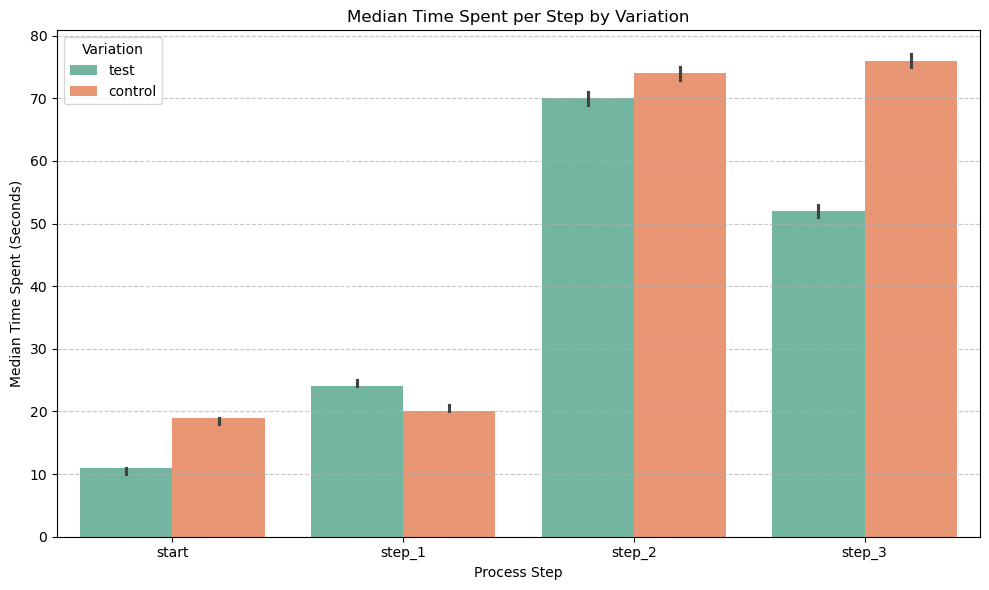

In [101]:
df_plot_time = df_all.copy()
df_plot_time = df_plot_time[df_plot_time['process_step'] != 'start']
df_plot_time = df_plot_time.reset_index(drop=True)
df_plot_time.loc[df_plot_time['process_step'] == 'step_1', 'process_step'] = 'start'
df_plot_time.loc[df_plot_time['process_step'] == 'step_2', 'process_step'] = 'step_1'
df_plot_time.loc[df_plot_time['process_step'] == 'step_3', 'process_step'] = 'step_2'
df_plot_time.loc[df_plot_time['process_step'] == 'validate', 'process_step'] = 'step_3'


# Bar chart for median time spent per step
plt.figure(figsize=(10, 6))
sns.barplot(data=df_plot_time, x='process_step', y='time_delta', order=["start", "step_1","step_2","step_3"], estimator = 'median', hue='variation', palette='Set2')

# Customize the chart
plt.title("Median Time Spent per Step by Variation")
plt.xlabel("Process Step")
plt.ylabel("Median Time Spent (Seconds)")
plt.legend(title="Variation")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

In [58]:
test_group.groupby(by='process_step').mean()

,time_delta
process_step,
start,NaN
step_1,3.526475
step_2,37.325393
step_3,92.851024
validate,143.254736


In [31]:
control_group.groupby(by='process_step').mean()

,time_delta
process_step,
start,NaN
step_1,18.491384
step_2,34.409333
step_3,95.511871
validate,136.016508


In [60]:
control_group.shape

(109172, 2)

In [56]:
test_group.shape

(130159, 2)

In [87]:
test_group.groupby(by='process_step')['time_delta'].mean()

process_step
step_1       29.412220
step_2       37.144024
step_3       92.680961
validate    102.481791
Name: time_delta, dtype: float64

In [82]:
control_group.groupby(by='process_step')['time_delta'].mean()

process_step
step_1       38.377225
step_2       35.705939
step_3       97.832445
validate    126.366703
Name: time_delta, dtype: float64

## Hypothesis 
H0 : Mean time spent for step 1 for control group is greater or equal than time spent for test 1 for test group 

H1: Mean time spent for step 1 for test group is less than time spent for test 1 for control group 


In [93]:
import math

# Given summary statistics
n2 = control_group.shape[0]  # Sample size for Process B
mean2 = control_group.groupby(by='process_step')['time_delta'].mean().values[0]  # Mean for Process B
std2 = control_group.groupby(by='process_step')['time_delta'].std().values[0]  # Standard deviation for Process B

n1 = test_group.shape[0]  # Sample size for Process A 
mean1 = test_group.groupby(by='process_step')['time_delta'].mean().values[0]  # Mean for Process A
std1 = test_group.groupby(by='process_step')['time_delta'].std().values[0]  # Standard deviation for Process A

# Calculate the t-statistic
t_stat = (mean1 - mean2) / math.sqrt((std1**2 / n1) + (std2**2 / n2))

# Calculate the degrees of freedom (using the formula above)
df = ((std1**2 / n1 + std2**2 / n2) ** 2) / ((std1**2 / n1) ** 2 / (n1 - 1) + (std2**2 / n2) ** 2 / (n2 - 1))

# Calculate the p-value for a one-tailed test (right-tailed)
p_value = st.t.cdf(t_stat, df)

# Output results
print("T-statistic:", t_stat)
print("Degrees of freedom:", df)
print("P-value:", p_value)


# Decision based on the p-value (assuming a 0.05 significance level)
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: Mean of Process A is significantly less than the mean of Process B.")
else:
    print("Fail to reject the null hypothesis: There is insufficient evidence to conclude Process A mean is less than Process B.")



T-statistic: -20.69505277132085
Degrees of freedom: 135850.17136771677
P-value: 2.691893783390963e-95
Reject the null hypothesis: Mean of Process A is significantly less than the mean of Process B.


In [94]:
import math

# Given summary statistics
n2 = control_group.shape[0]  # Sample size for Process B
mean2 = control_group.groupby(by='process_step')['time_delta'].mean().values[1]  # Mean for Process B
std2 = control_group.groupby(by='process_step')['time_delta'].std().values[1]  # Standard deviation for Process B

n1 = test_group.shape[0]  # Sample size for Process A 
mean1 = test_group.groupby(by='process_step')['time_delta'].mean().values[1]  # Mean for Process A
std1 = test_group.groupby(by='process_step')['time_delta'].std().values[1]  # Standard deviation for Process A

# Calculate the t-statistic
t_stat = (mean1 - mean2) / math.sqrt((std1**2 / n1) + (std2**2 / n2))

# Calculate the degrees of freedom (using the formula above)
df = ((std1**2 / n1 + std2**2 / n2) ** 2) / ((std1**2 / n1) ** 2 / (n1 - 1) + (std2**2 / n2) ** 2 / (n2 - 1))

# Calculate the p-value for a one-tailed test (right-tailed)
p_value = st.t.cdf(t_stat, df)

# Output results
print("T-statistic:", t_stat)
print("Degrees of freedom:", df)
print("P-value:", p_value)


# Decision based on the p-value (assuming a 0.05 significance level)
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: Mean of Process A is significantly less than the mean of Process B.")
else:
    print("Fail to reject the null hypothesis: There is insufficient evidence to conclude Process A mean is less than Process B.")



T-statistic: 4.833645245095609
Degrees of freedom: 130141.9818082224
P-value: 0.9999993289606273
Fail to reject the null hypothesis: There is insufficient evidence to conclude Process A mean is less than Process B.


In [95]:
import math

# Given summary statistics
n2 = control_group.shape[0]  # Sample size for Process B
mean2 = control_group.groupby(by='process_step')['time_delta'].mean().values[2]  # Mean for Process B
std2 = control_group.groupby(by='process_step')['time_delta'].std().values[2]  # Standard deviation for Process B

n1 = test_group.shape[0]  # Sample size for Process A 
mean1 = test_group.groupby(by='process_step')['time_delta'].mean().values[2]  # Mean for Process A
std1 = test_group.groupby(by='process_step')['time_delta'].std().values[2]  # Standard deviation for Process A

# Calculate the t-statistic
t_stat = (mean1 - mean2) / math.sqrt((std1**2 / n1) + (std2**2 / n2))

# Calculate the degrees of freedom (using the formula above)
df = ((std1**2 / n1 + std2**2 / n2) ** 2) / ((std1**2 / n1) ** 2 / (n1 - 1) + (std2**2 / n2) ** 2 / (n2 - 1))

# Calculate the p-value for a one-tailed test (right-tailed)
p_value = st.t.cdf(t_stat, df)

# Output results
print("T-statistic:", t_stat)
print("Degrees of freedom:", df)
print("P-value:", p_value)


# Decision based on the p-value (assuming a 0.05 significance level)
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: Mean of Process A is significantly less than the mean of Process B.")
else:
    print("Fail to reject the null hypothesis: There is insufficient evidence to conclude Process A mean is less than Process B.")



T-statistic: -10.60250052172961
Degrees of freedom: 130419.43572644697
P-value: 1.4867722619723488e-26
Reject the null hypothesis: Mean of Process A is significantly less than the mean of Process B.


In [96]:
import math

# Given summary statistics
n2 = control_group.shape[0]  # Sample size for Process B
mean2 = control_group.groupby(by='process_step')['time_delta'].mean().values[3]  # Mean for Process B
std2 = control_group.groupby(by='process_step')['time_delta'].std().values[3]  # Standard deviation for Process B

n1 = test_group.shape[0]  # Sample size for Process A 
mean1 = test_group.groupby(by='process_step')['time_delta'].mean().values[3]  # Mean for Process A
std1 = test_group.groupby(by='process_step')['time_delta'].std().values[3]  # Standard deviation for Process A

# Calculate the t-statistic
t_stat = (mean1 - mean2) / math.sqrt((std1**2 / n1) + (std2**2 / n2))

# Calculate the degrees of freedom (using the formula above)
df = ((std1**2 / n1 + std2**2 / n2) ** 2) / ((std1**2 / n1) ** 2 / (n1 - 1) + (std2**2 / n2) ** 2 / (n2 - 1))

# Calculate the p-value for a one-tailed test (right-tailed)
p_value = st.t.cdf(t_stat, df)

# Output results
print("T-statistic:", t_stat)
print("Degrees of freedom:", df)
print("P-value:", p_value)


# Decision based on the p-value (assuming a 0.05 significance level)
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: Mean of Process A is significantly less than the mean of Process B.")
else:
    print("Fail to reject the null hypothesis: There is insufficient evidence to conclude Process A mean is less than Process B.")



T-statistic: -28.86082518359561
Degrees of freedom: 133445.93673277338
P-value: 6.782470764089347e-183
Reject the null hypothesis: Mean of Process A is significantly less than the mean of Process B.
